In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9379,1.0,0.0,0.0,0.0,1.0,While upper cast Hindus-were in majority in co...,racism,NaN,NaN,NaN,NaN
9380,1.0,0.0,0.0,0.0,1.0,s Raw has launched a new T.T.I (T.Taliban Indi...,racism,NaN,NaN,NaN,NaN
9381,0.0,0.0,0.0,1.0,0.0,Worth the read. Read it If Muslims can polariz...,none,NaN,NaN,NaN,NaN
9382,1.0,0.0,0.0,0.0,1.0,Matlab hi nahin..they had closely watched for ...,racism,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9384, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9384 entries, 0 to 9383
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       9384 non-null   float64
 1   sexism       9384 non-null   float64
 2   other        9384 non-null   float64
 3   none         9384 non-null   float64
 4   label        9384 non-null   float64
 5   tweet        9384 non-null   object 
 6   category     9384 non-null   object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 806.6+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

0

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9379,1.0,0.0,0.0,0.0,1.0,While upper cast Hindus-were in majority in co...,racism,NaN,NaN,NaN,NaN
9380,1.0,0.0,0.0,0.0,1.0,s Raw has launched a new T.T.I (T.Taliban Indi...,racism,NaN,NaN,NaN,NaN
9381,0.0,0.0,0.0,1.0,0.0,Worth the read. Read it If Muslims can polariz...,none,NaN,NaN,NaN,NaN
9382,1.0,0.0,0.0,0.0,1.0,Matlab hi nahin..they had closely watched for ...,racism,NaN,NaN,NaN,NaN


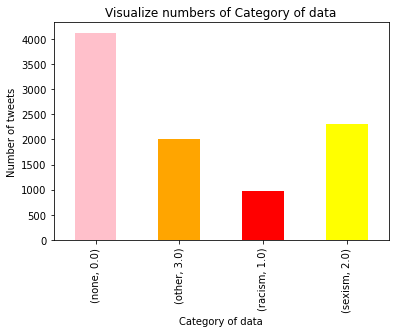

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

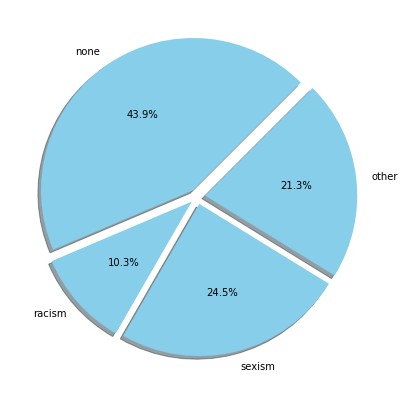

In [13]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [14]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'black'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


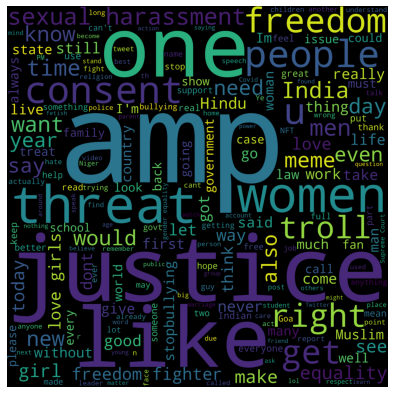

In [15]:
wordcloud_draw(none, 'none')

racism related tweets : 


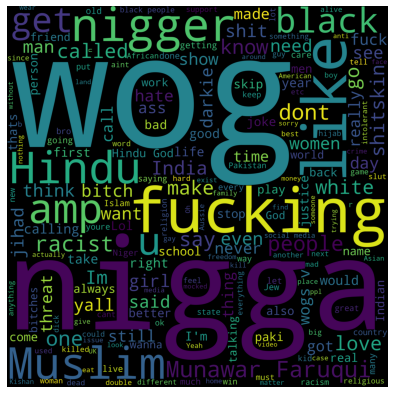

In [16]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


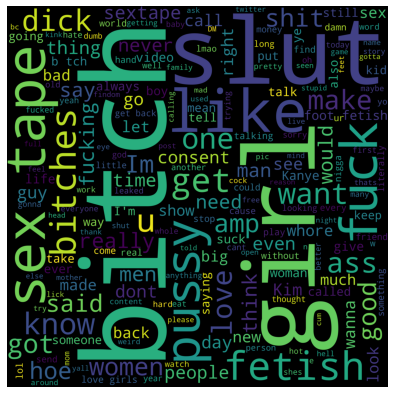

In [17]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


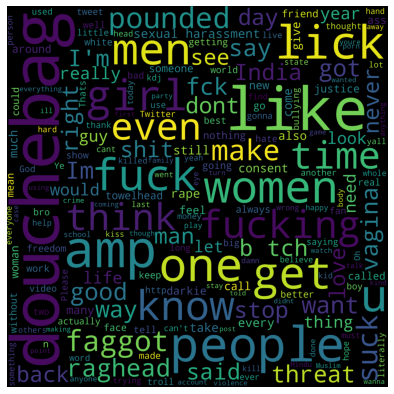

In [18]:
wordcloud_draw(other, 'other')

In [13]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

9384
9384


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
X = np.array(df.iloc[:,0].values)
y = np.array(df.category.values)
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(df.tweet).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (9384, 5000)
y.shape =  (9384,)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

7507
1877


In [16]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
y_train

array(['sexism', 'sexism', 'other', ..., 'none', 'racism', 'other'],
      dtype=object)

In [19]:
y_test

array(['none', 'none', 'sexism', ..., 'sexism', 'none', 'other'],
      dtype=object)

In [20]:
#create list of model and accuracy dicts
perform_list = [ ]

In [27]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        tunned_parameters = { 'kernel': [ 'linear', 'rbf' ],  
                                     'gamma': [1e-3, 1e-4],
                                    'C':[1,10, 100, 1000]
                                    }


        mdl  = GridSearchCV(svm.SVC(), tunned_parameters)

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [22]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 78.42 %
Precision : 0.7842301545018647
Recall : 0.7842301545018647
F1-score : 0.7842301545018647
Time taken:  20.20686149597168


In [23]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 71.76 %
Precision : 0.7176345231752796
Recall : 0.7176345231752796
F1-score : 0.7176345231752795
Time taken:  2.4530699253082275


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [ ]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [27]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,79.01,0.79,0.79,0.79
1,Multinomial Naive Bayes,73.26,0.73,0.73,0.73
2,Random Forest,81.03,0.81,0.81,0.81


In [28]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 81.03 %


In [29]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [31]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(cv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [76]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : srk lata mangeshkar
1492174088869228556 2022-02-11 22:00:00 +0530 <QuintFactCheck> #WebQoof | A short video showing @iamsrk paying his respects by offering 'dua' (prayer) at the late Lata Mangeshkar's funeral was widely shared, falsely claiming that Khan spat at the her mortal remains. Read here.   https://t.co/Iz73Y5xZt6
1492051522816983059 2022-02-11 13:52:58 +0530 <iam_raheman_srk> RT @Kash38958629: RT @BOWorldwide: Amid #LataMangeshkar funeral controversy, #SRK’s old video on how his family fought in India’s freedom struggle goes viral  #ShahRukhKhan @iamsrk @SRKCHENNAIFC @SRKUniverse @TeamSRKWarriors   https://t.co/UUQ7WTmbeY
1492051514248019985 2022-02-11 13:52:56 +0530 <iam_raheman_srk> RT @IJagirdaar: RT @BOWorldwide: Amid #LataMangeshkar funeral controversy, #SRK’s old video on how his family fought in India’s freedom struggle goes viral  #ShahRukhKhan @iamsrk @SRKCHENNAIFC @SRKUniverse @TeamSRKWarriors   https://t.co/UUQ7WTmbeY
14920290690

In [77]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


229


0      RT @Kash38958629: RT @BOWorldwide: Amid #LataM...
1      RT @IJagirdaar: RT @BOWorldwide: Amid #LataMan...
2      @MrSinha_ @HabibKhanT Bhai tu rehne de, you we...
3      SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
4      Not a fan of @iamsrk But, there is a section o...
                             ...                        
224    There is some news that a fucker named #AryanS...
225    そう‼️コレが正しい  #SRK made a dua at Lata Mangeshkar...
226    ラタ・マンゲシュカルの遺体にSRK 様が唾をかけたとヒンドゥー至上主義が批判しているとの記事...
227     https://t.co/jWpMm58keO @iamsrk @mangeshkarla...
228    নেটপাড়া এখন দুই ভাগে বিভক্ত। এক দল বলছে, শাহর...
Name: tweet, Length: 229, dtype: object

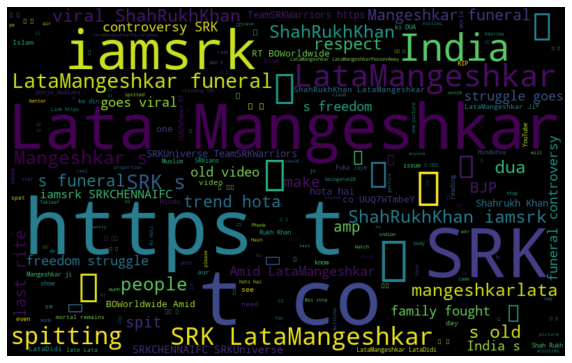

In [78]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [79]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en' and (len(p.clean(input_txt)) > 3):
            return p.clean(input_txt)

    except Exception as e:
        print(e)

In [80]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

In [81]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0    : RT : Amid funeral controversy, old video on ...
1    : RT : Amid funeral controversy, old video on ...
2                                                 None
3    SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
4    Not a fan of But, there is a section of politi...
Name: tweet, dtype: object

Length before deleting:  229
Length after deleting:  153
Empty values:  0


In [82]:
df1['tweet'].head()

0    : RT : Amid funeral controversy, old video on ...
1    : RT : Amid funeral controversy, old video on ...
2    SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
3    Not a fan of But, there is a section of politi...
4    Popular actor, Anindya Chatterjee, denounced t...
Name: tweet, dtype: object

In [114]:
y_pred1 = cv.transform(df1['tweet'][:10].values)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   





[1]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[2]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[3]  Bhai tu rehne de, you were spreading likes about SRK at Lata Mangeshkars funeral.  [none]

[4]  SRK Lata Mangeshkar ! Shaharukh Khan Twitter Trolls | Viral video !  [none]

[5]  Not a fan of But, there is a section of politicians who have promised to blow every issue out of proportion to harm the nation. They have no knowledge that Muslims blow air after dua.'He is NOT SPITTING on anyone' ! was like his mother.  [none]

[6]  Popular actor, Anindya Chatterjee, denounced those critical of SRKs gesture at Lata Mangeshkars funeral saying, You see Shah Rukh Khan. I see the tallest statue of India and the statue of unity in one picture. People are simply blowing this out of proportion .  [none]

[7]  Watching one another Time What a beautiful Movie H